p.102 연습문제 3 _ 201921441 최준서

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
bank = pd.read_csv("data/bank-additional-full.csv",sep=";")

(1) contact

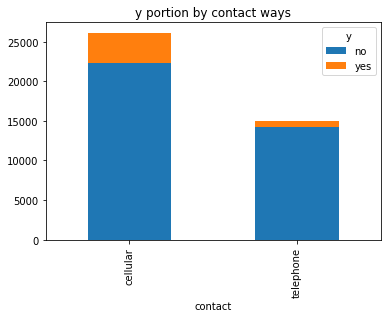

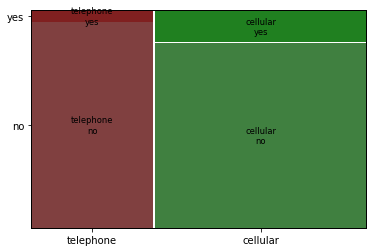

In [14]:
counts = pd.crosstab(bank.contact, bank.y)
counts.plot(kind='bar', stacked=True)
plt.title('y portion by contact ways')
mosaic(bank, ['contact', 'y'])
plt.show()

Comment: 그래프에서 보이는 바와 같이 유선 전화로 전화를 했을 때보다 무선 전화로 전화를 하여 접촉을 했을 때 정기예금 가입자의 비율이 훨씬 높다. 따라서 접촉 방법이 정기예금 가입자 수에 큰 영향을 끼친다. 우선 무선 전화를 이용한 횟수가 유선 전화를 이용한 횟수보다 훨씬 많다. 유선 전화 사용을 축소하고 무선 전화 사용 비율을 더 늘리는 것이 효율적일 것으로 추정된다.

(2) campaign

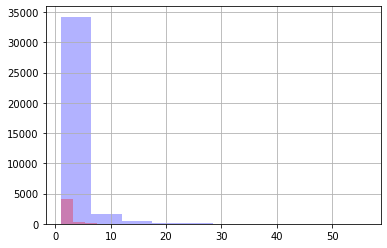

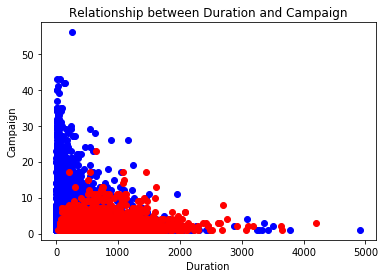

In [26]:
bank.campaign[bank.y == 'no'].hist(alpha=0.3, color='b')
bank.campaign[bank.y == 'yes'].hist(alpha=0.3, color='r')
plt.show()
plt.plot(bank.duration[bank.y == 'no'],
bank.campaign[bank.y == 'no'], 'bo')
plt.plot(bank.duration[bank.y == 'yes'],
bank.campaign[bank.y == 'yes'], 'ro')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.title('Relationship between Duration and Campaign')
plt.show()

Comment: 위의 그래프는 접촉 횟수에 따른 정기 예금 가입자 수의 분포를 나타내며, 두 그래프 모두 빨간색 점들은 y가 yes인 사람들, 파란색 점들은 y가 no인 사람들의 분포를 나타낸다. 해당 캠페인에서의 접촉 횟수가 증가할수록 가입자 수의 비율이 급격하게 감소하는 것을 확인할 수 있다. 이 역시 정기 예금 가입자 수에 큰 영향을 끼친다. 일정 횟수 이상의 접촉을 하지 않도록 하는 것이 바람직해 보인다.

(3) poutcome

캠페인 성공 비율: 0.24408888888888888


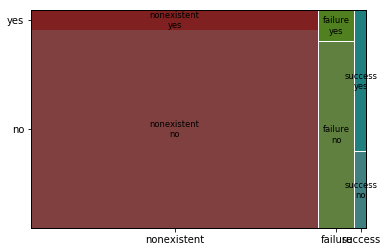

In [70]:
porsuc = len(bank[bank.poutcome == 'success'])/(len(bank[bank.poutcome == 'failure'])+len(bank[bank.poutcome == 'success']))
print('캠페인 성공 비율:', porsuc)
mosaic(bank, ['poutcome', 'y'])
plt.show()

Comment: 캠페인을 성공시킨 여부에 상관 없이 캠페인이 진행된 여부에 따라도 정기예금 가입자의 비율이 크게 차이난다. 단순히 정기예금 가입자수를 늘릴 목적이라면 캠페인을 무조건 진행하는 방향이 바람직하다. 그 밖에도 보이는 점은 캠페인을 성공했을 때에는 가입자 수의 비율이 다른 분포보다 월등하게 높다는 점과, 지금까지의 캠페인 성공 비율은 약 24%라는 점이다.

(4) emp.var.rate

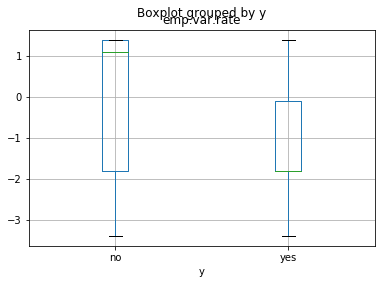

In [71]:
bank.boxplot(column=['emp.var.rate'], by="y")
plt.show()

Comment: 고용률이 높을 때에는 정기예금 가입자의 비율이 감소한다. 고용률이 정기예금 가입자 수에 큰 영향을 끼치는 것을 알 수 있다. 따라서 고용률이 높을 때 좀 더 집중적으로 캠페인을 진행하면 시기별로 전체적인 정기예금 가입자 수가 늘어날 것으로 보인다.

(5) cons.conf.idx

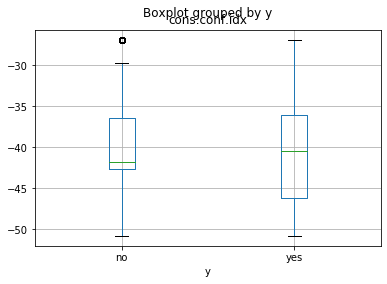

In [73]:
bank.boxplot(column=['cons.conf.idx'], by="y")
plt.show()

Comment: 정기예금의 가입자들은 상대적으로 평균 월별 소비자 안심 지수가 미가입자들보다 낮게 나왔다. 월별 소비자 안심 지수도 정기예금 가입에 영향을 끼치는 것이다. 월별 소비자 안심 지수가 상대적으로 낮은 사람들이 정기예금에 가입되어 있지 않는 경우가 많으므로 이 안심 지수가 낮은 사람들을 대상으로 캠페인을 진행하면 전체적인 정기예금 가입자 수가 증가할 것으로 추정된다.